In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE (6) (1).csv" ,header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Looks like all the features are identified as object but can be converted into numeric, if we remove rows which has strings.

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

# Data cleaning

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

In [8]:
df.loc[0:122 , "Region"] = 1
df.loc[122: , "Region"] = 2

In [9]:
df["Region"] = df["Region"].astype(int)

In [10]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [11]:
df.dtypes


day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

In [12]:
#  Removing the null or na values rows

In [13]:
df = df.dropna().reset_index(drop=True)

In [14]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [15]:
df.shape

(244, 15)

In [16]:
#  finding columns with string value
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [17]:
type(df.iloc[[122]])

pandas.core.frame.DataFrame

In [18]:
#  NUll and unwanted rows are deleted

df = df.drop(122).reset_index(drop=True)

  Some column name were missed so we can fix it.

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Looks like the values were missplaced so we can use str.strip() method

In [20]:
df.columns = df.columns.str.strip()

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [23]:
df[["day" , "month" , "year" , "Temperature" , "RH" , "Ws"]] = df[["day" , "month" , "year" , "Temperature" , "RH" , "Ws"]].astype(int)

In [24]:
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

Changing the other values to Float data type

In [25]:
objects = [column for column in df.columns if df[column].dtype=="O"]

In [26]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [27]:
for i in objects:
    if i !=  'Classes':
        df[[i]] = df[[i]].astype(float)

In [28]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


data cleaning in target variable

In [30]:
# check unique values of target variable
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64


Looks like the values were misspaced so we can use str.strip() method

In [31]:
df["Classes"] = df["Classes"].str.strip()

In [32]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

# Region 1(Bejaia Region)

In [33]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


# Region 2 (Sidi-Bel Abbes Region)

In [34]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [35]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

# Exploratory Data Analysis (EDA)

In [36]:
# dropping year features
df1 = df.drop(["day","month","year"],axis=1)

In [37]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [38]:
# Encoding Not fire as 0 and Fire as 1
df1["Classes"] = np.where(df1["Classes"] == "not fire",0,1)

In [39]:
# check counts

In [40]:
df1["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

# visualization of distribution

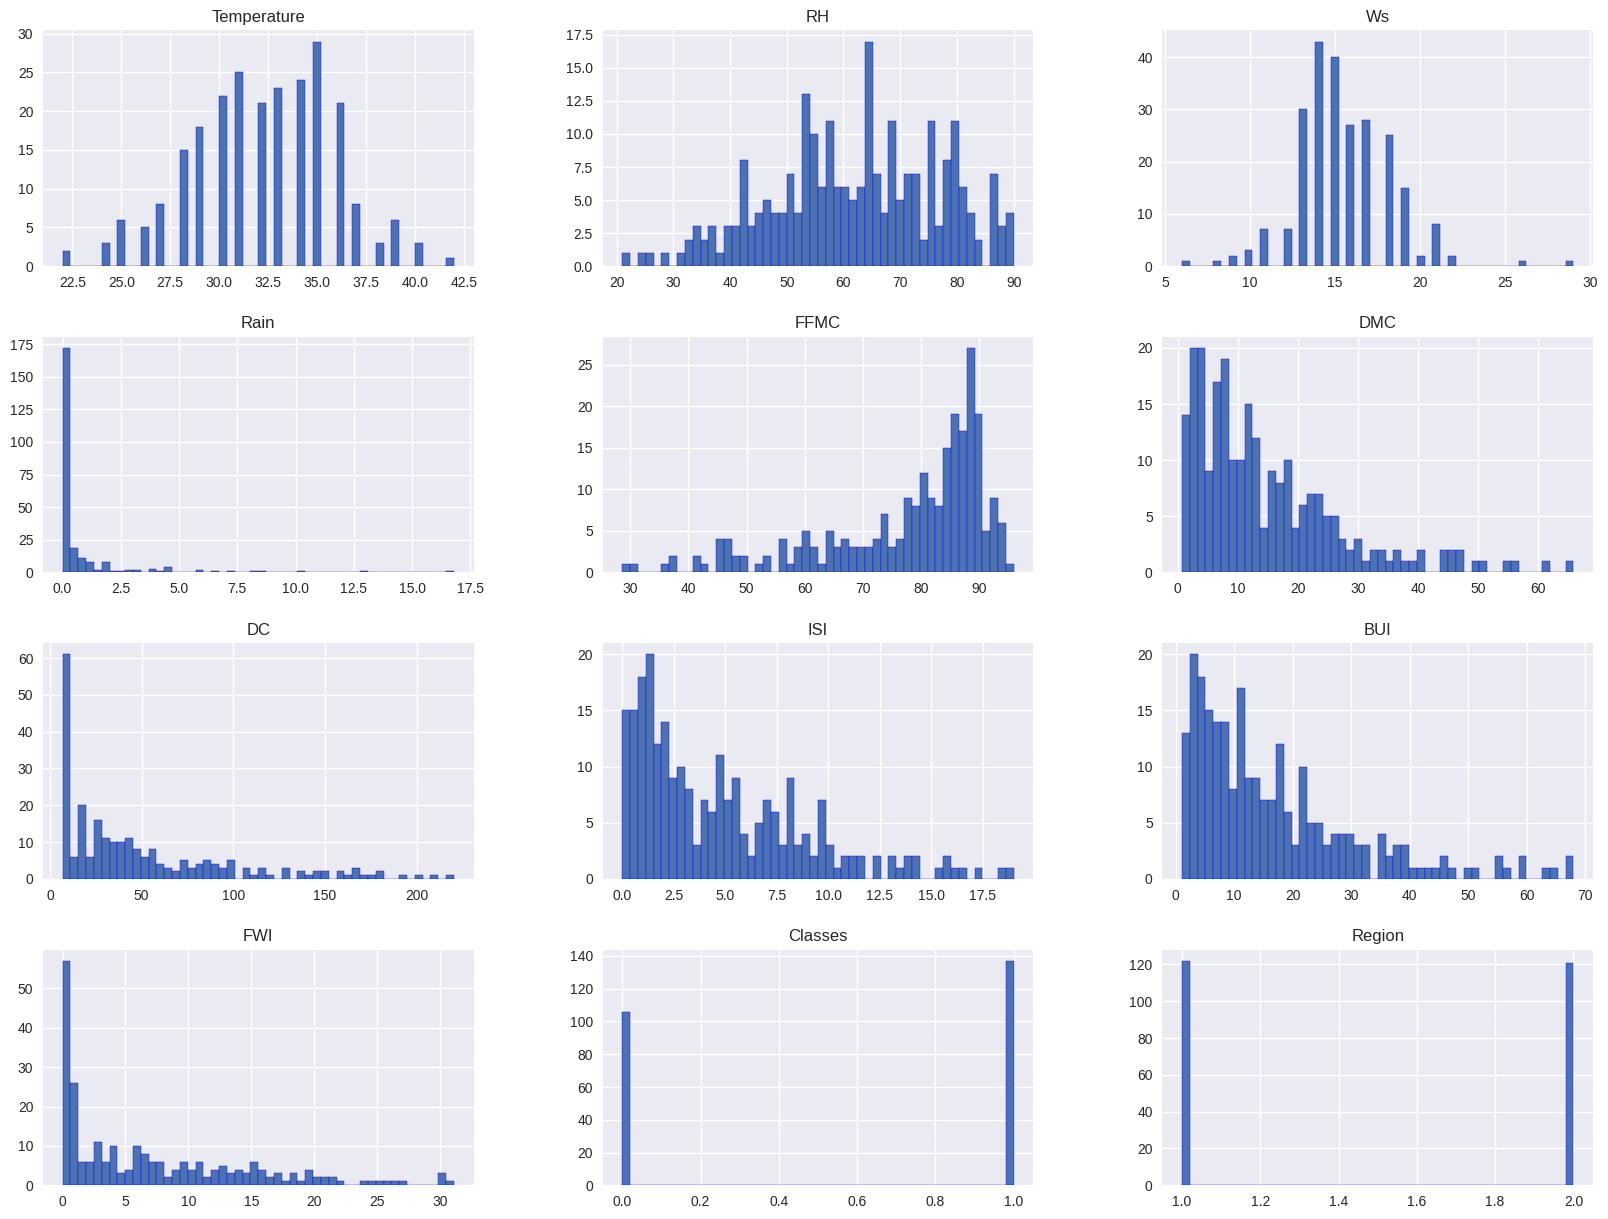

In [41]:
plt.style.use('seaborn')
df1.hist(bins = 50 , figsize = (20,15) , ec = 'b' )
plt.show()

In [42]:
# Percentage for pie chart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

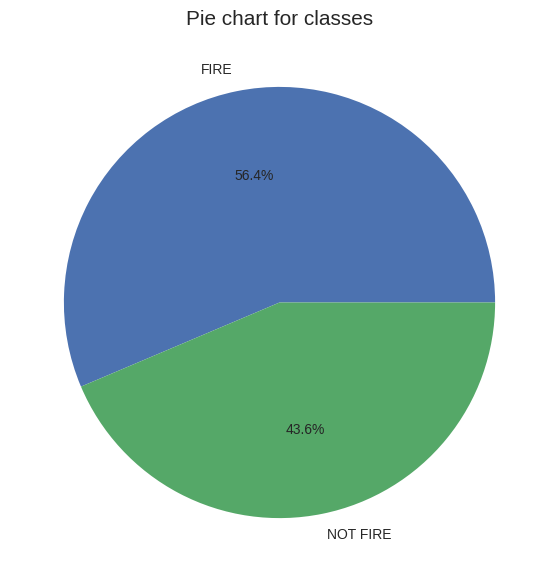

In [43]:
# plotting piechart
classlabels=["FIRE" , "NOT FIRE"]
plt.figure(figsize = (12,7))
plt.pie(percentage,labels = classlabels , autopct='%1.1f%%')
plt.title("Pie chart for classes" , fontsize=15)
plt.show()



<AxesSubplot: >

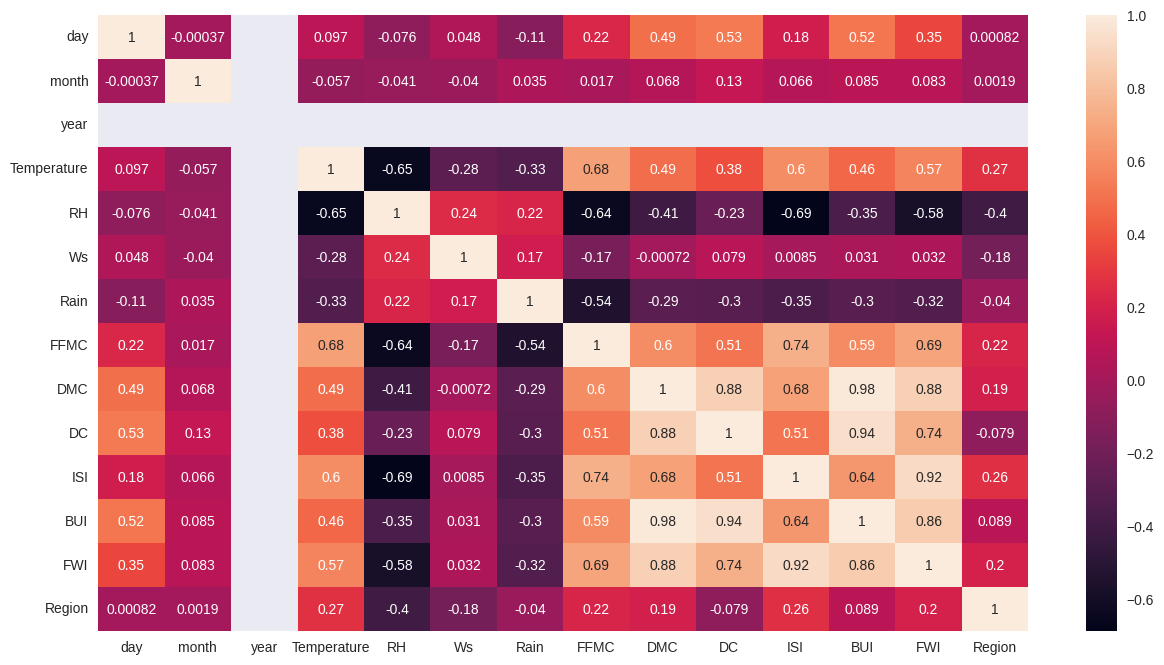

In [44]:
# correlation chart
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

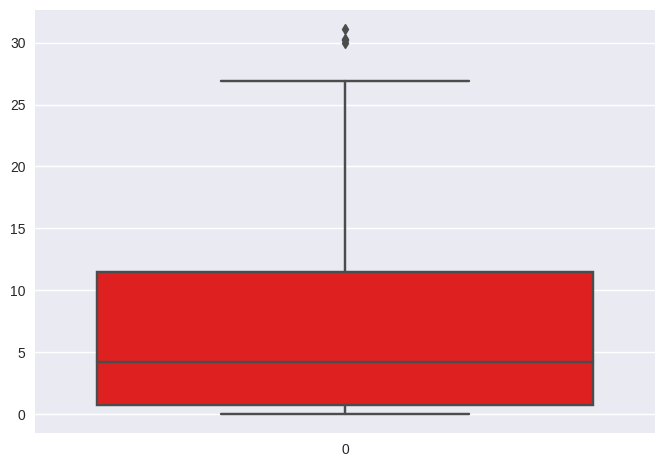

In [45]:
# boxplot
ax = sns.boxplot(df["FWI"] , color = "red")


#  Month wise Fire analysis

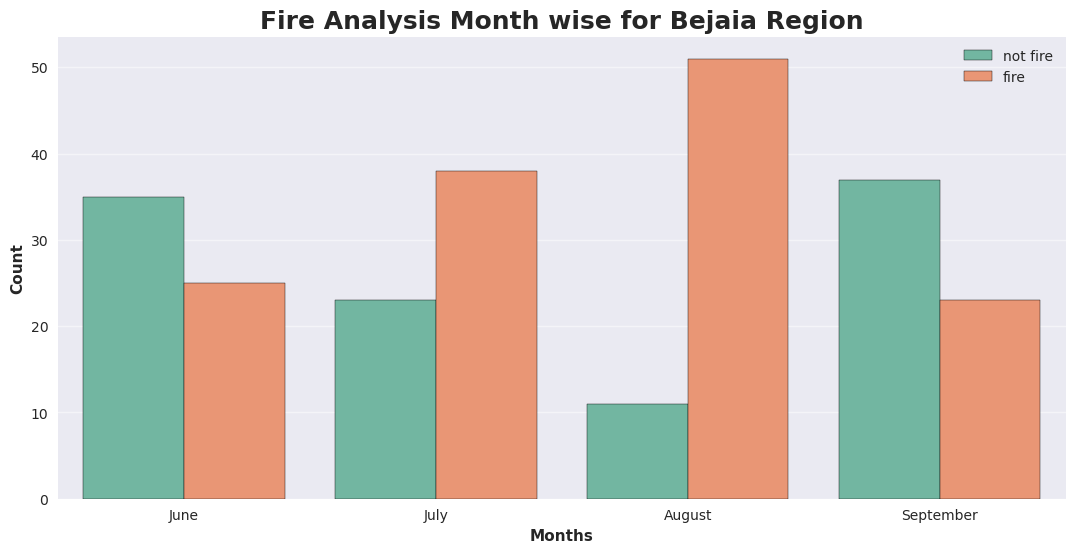

In [46]:
dftemp = df[df["Region"] == 1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = "month" , data = df  , hue = "Classes" , ec = "black" , palette="Set2")
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

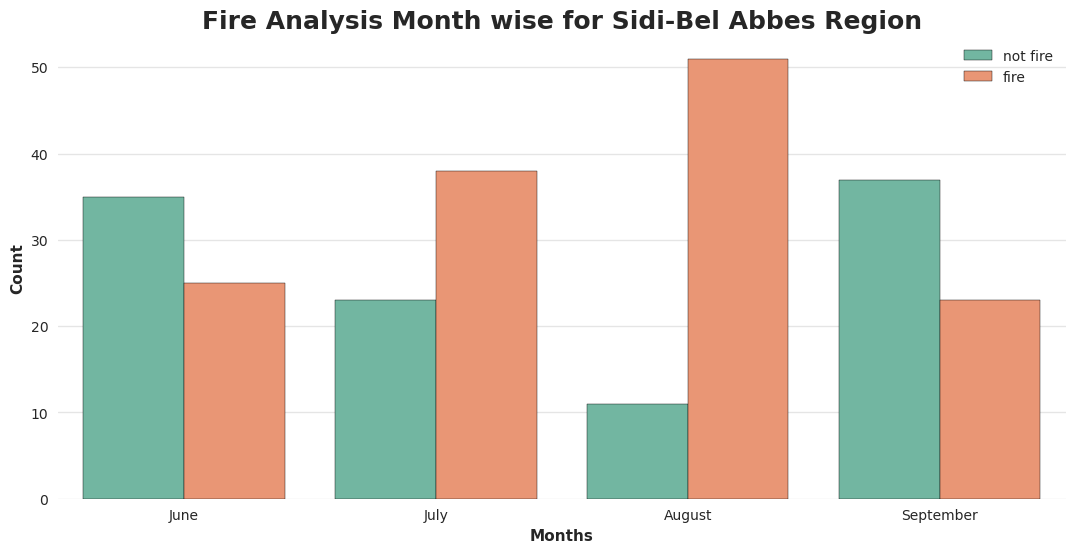

In [47]:
dftemp= df[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()


1. Its observed that August and July had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

2. Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

3. Less Fires was on September

# Exploratory Data Analysis (EDA) on all Features

In [48]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<AxesSubplot: xlabel='Temperature', ylabel='Count'>

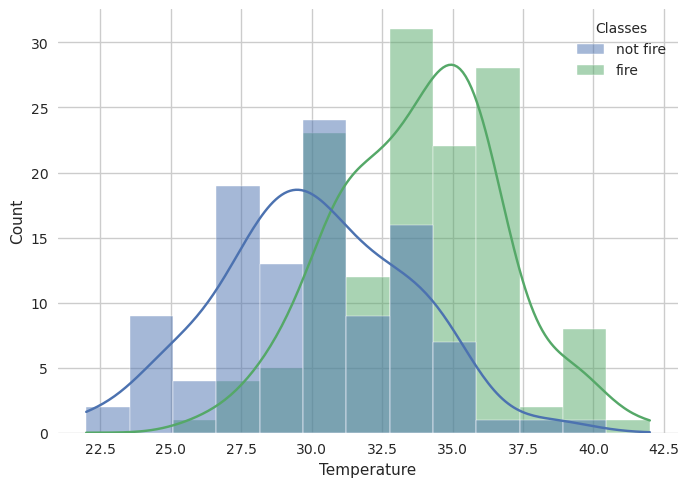

In [61]:
sns.histplot(x = "Temperature" , kde = True , data =df,hue = "Classes")

In [120]:
def fire_analysis_Bejaia(feature):
    plt.figure(figsize=(13,12))
    dftemp = df[df["Classes"]==1]
    sns.countplot(x = feature , data = df , hue = "Classes", palette='Set2')
    plt.title("Fire Analysis  for Bejaia Region" , fontsize = 18 , weight = "bold")
    plt.ylabel('Count', weight = 'bold')
    plt.xlabel(feature, weight= 'bold')
    plt.show()

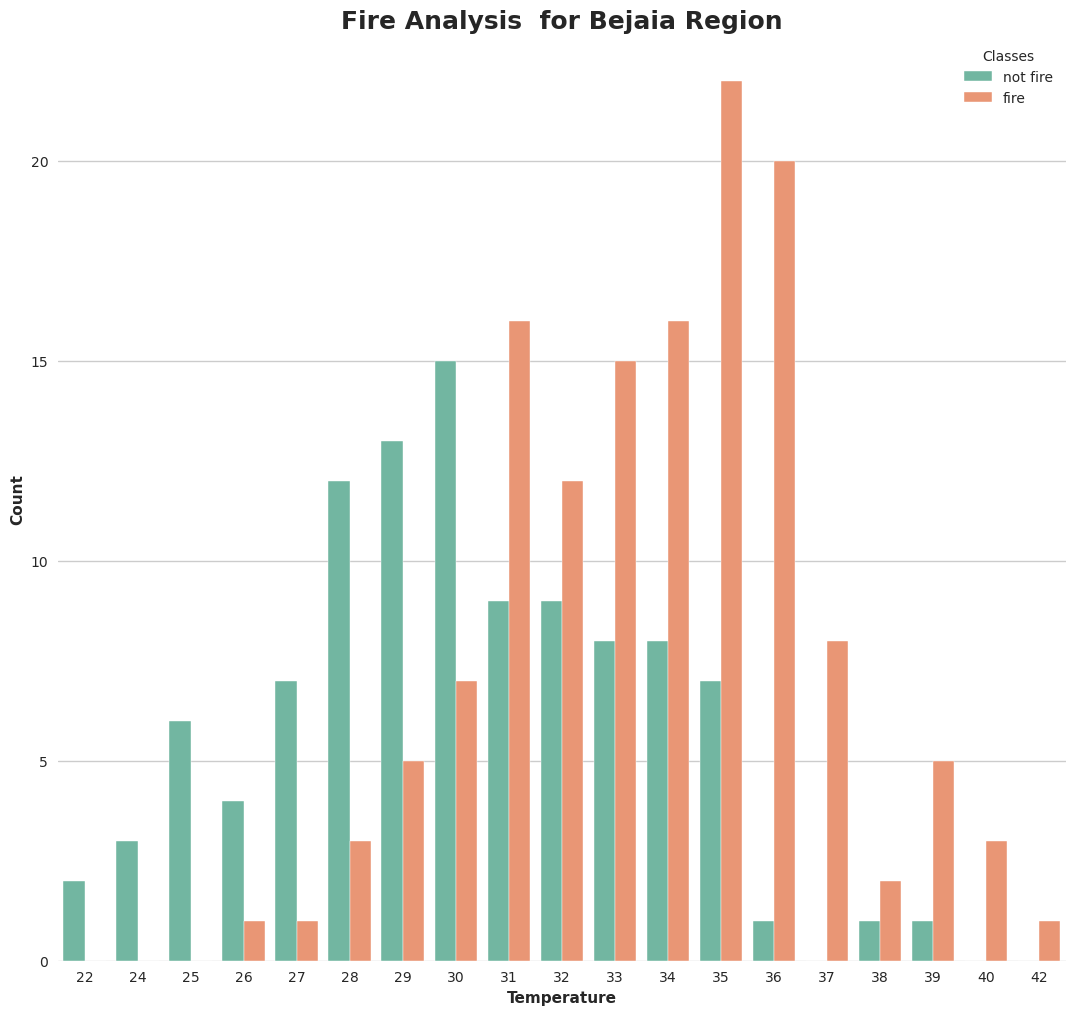

In [121]:
fire_analysis_Bejaia("Temperature")

In [122]:
def fire_analysis_Sidi(feature):
    plt.figure(figsize=(13,12))
    dftemp = df[df["Classes"]==2]
    sns.countplot(x = feature , data = df , hue = "Classes", palette='Set2')
    plt.title('Fire Analysis for Sidi-Bel Abbes Region' , fontsize = 18 , weight = "bold")
    plt.ylabel('Count', weight = 'bold')
    plt.xlabel(feature, weight= 'bold')
    plt.show()

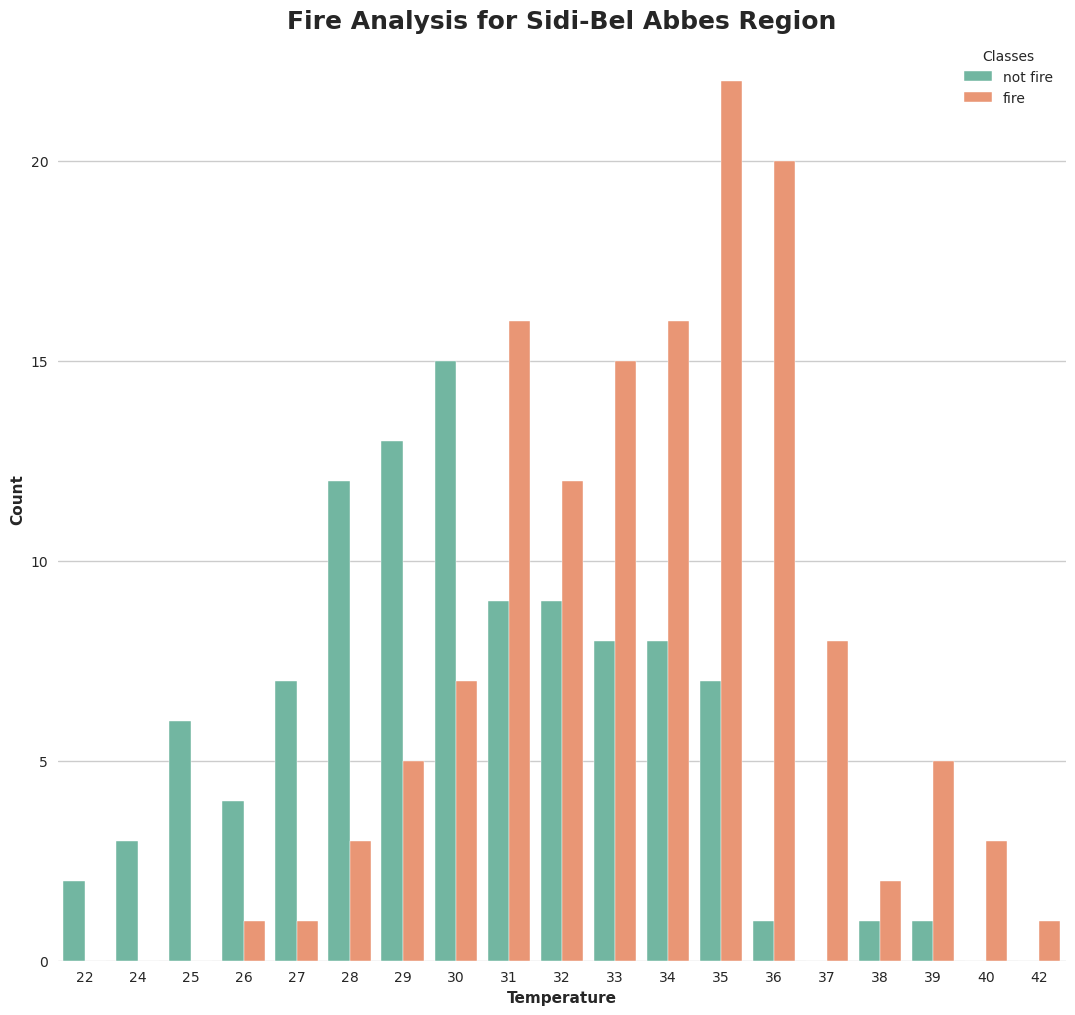

In [123]:
fire_analysis_Sidi("Temperature")

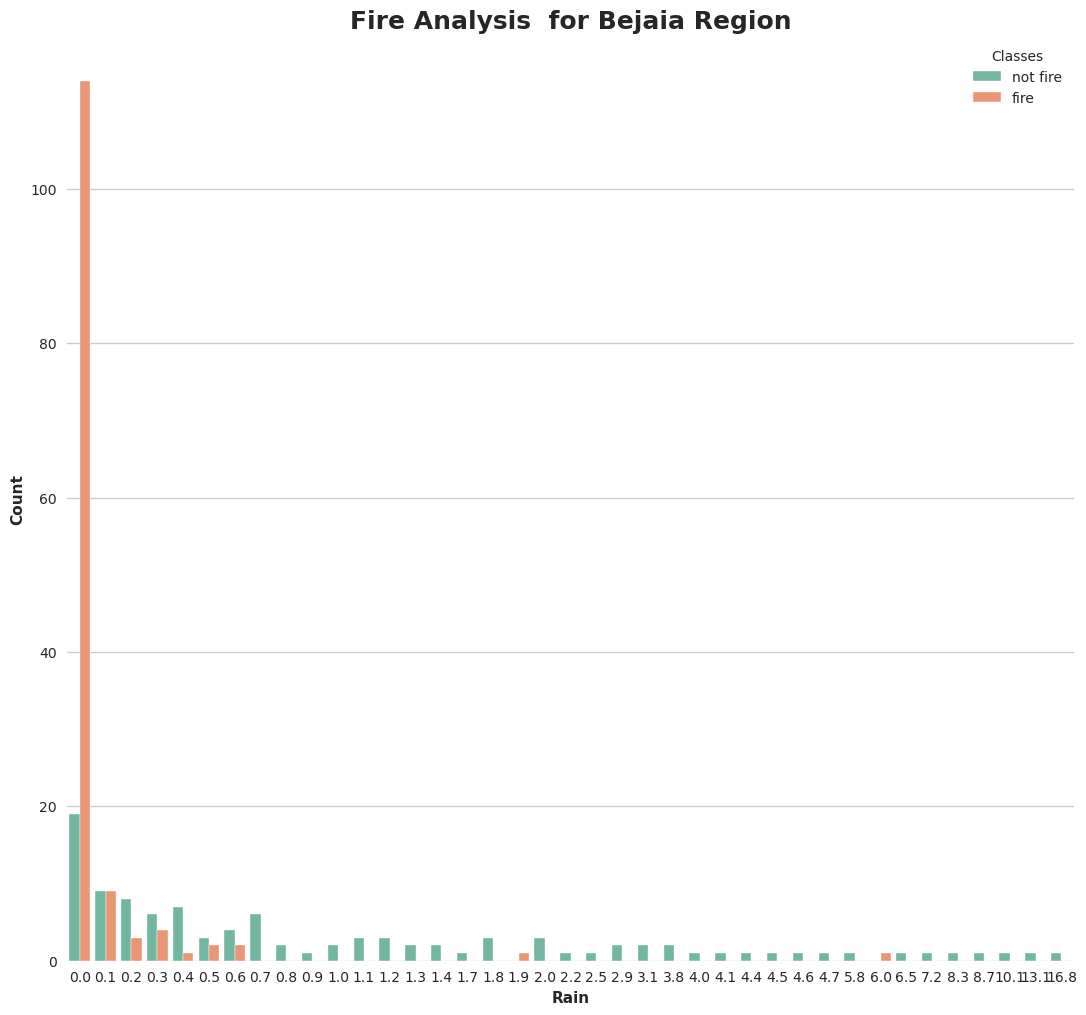

In [124]:
fire_analysis_Bejaia("Rain")

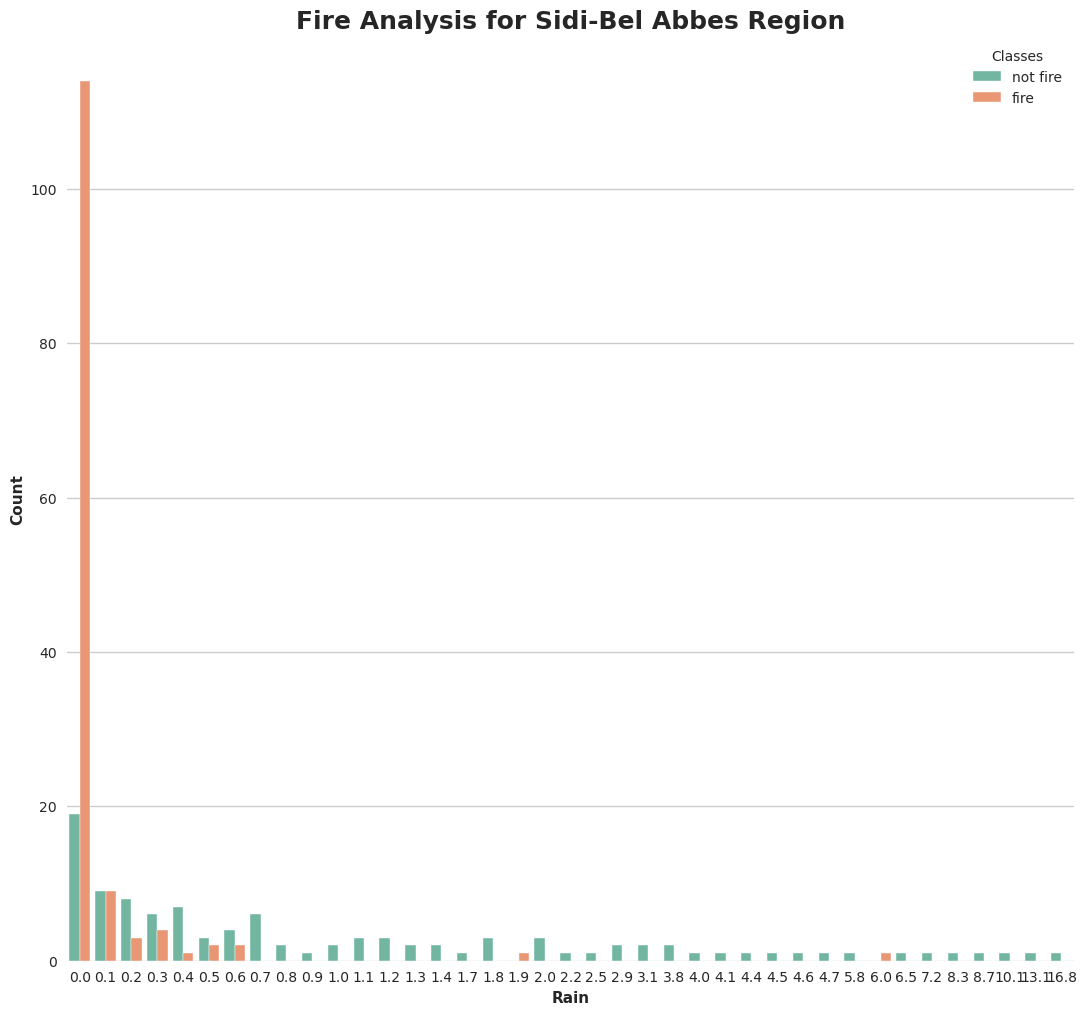

In [125]:
fire_analysis_Sidi("Rain")

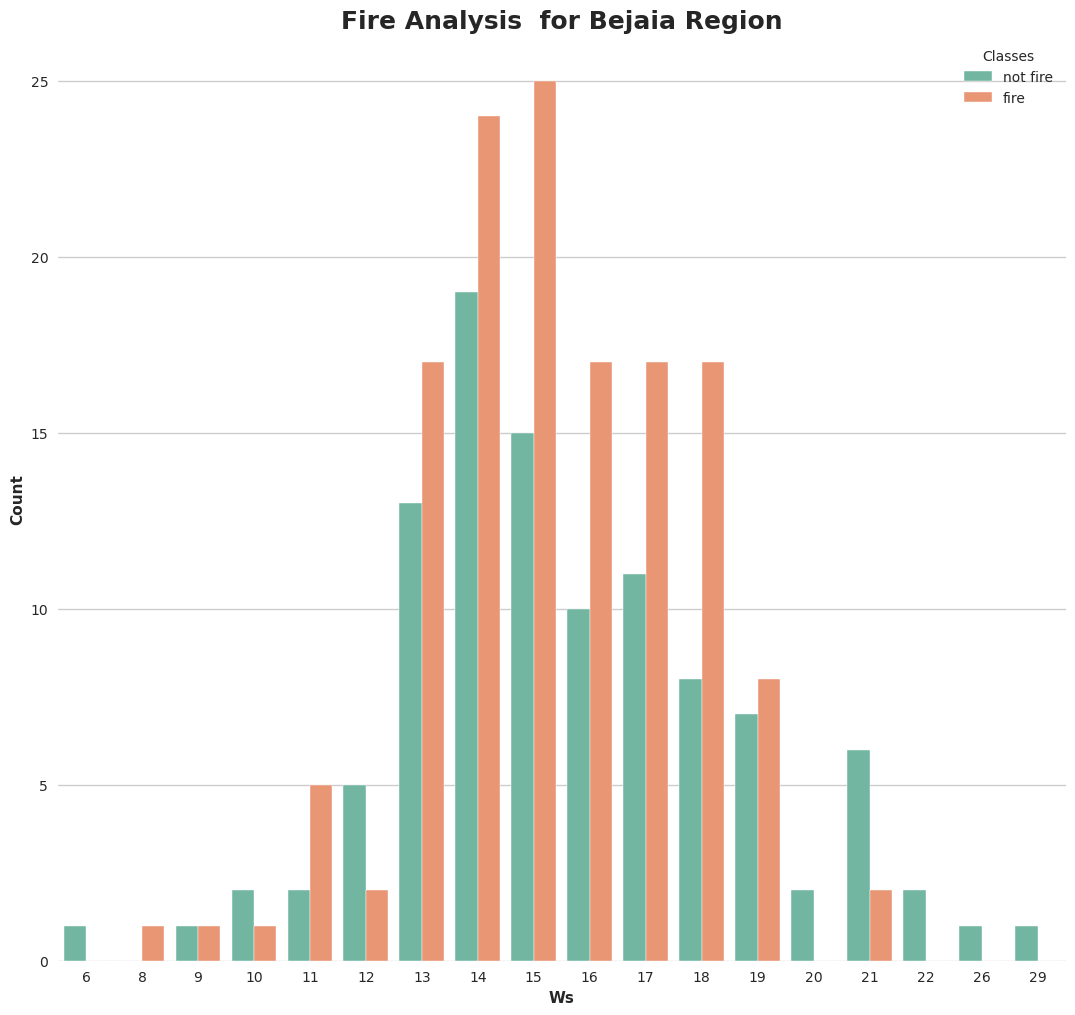

In [126]:
fire_analysis_Bejaia("Ws")

In [127]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

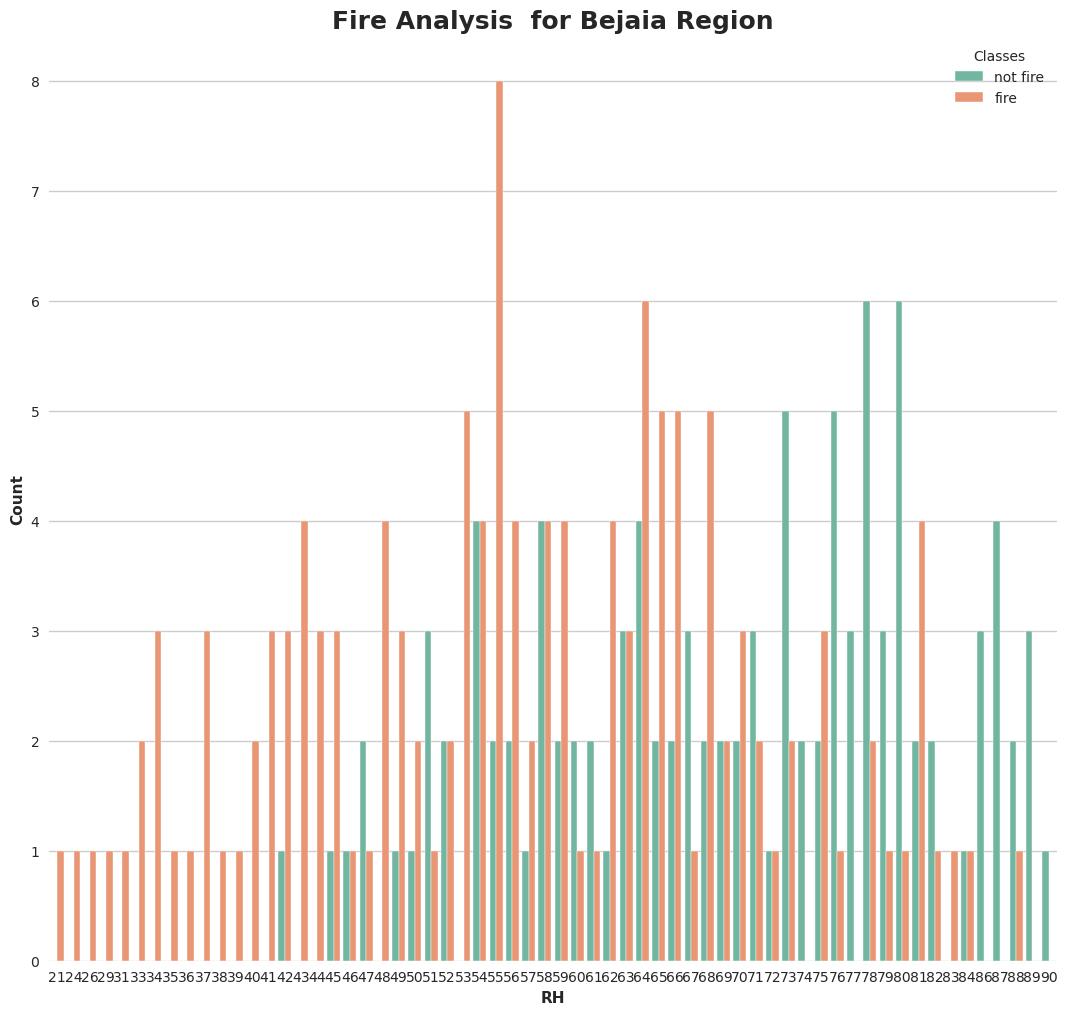

In [128]:
fire_analysis_Bejaia("RH")

In [133]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

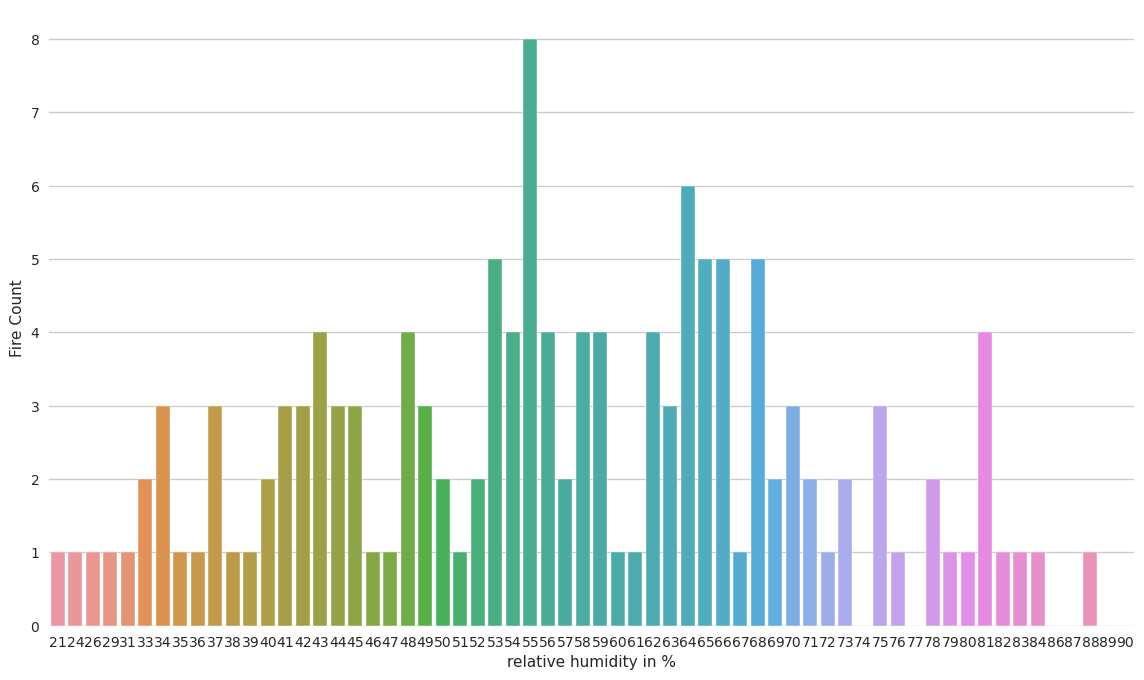

In [134]:
barchart("RH" , "relative humidity in %")

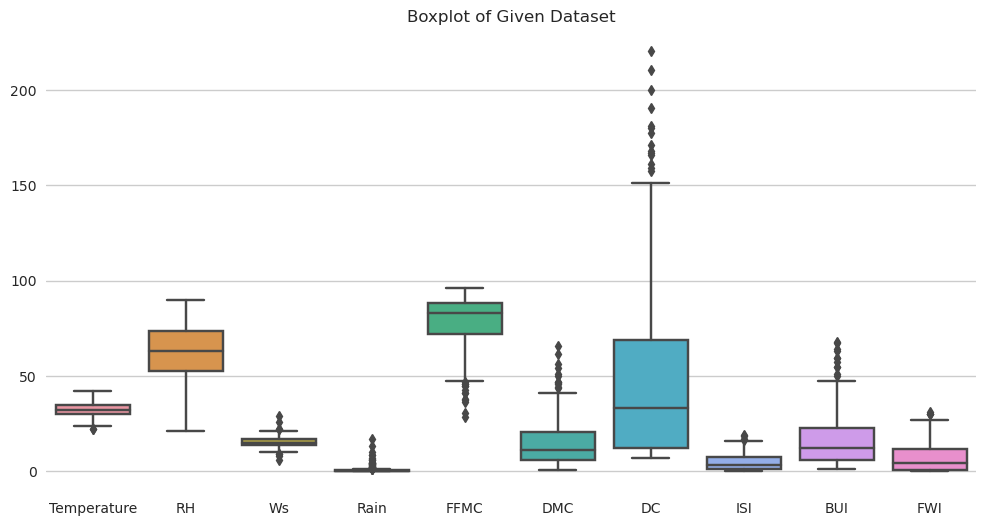

In [144]:
# boxplot
dftemp = df1.drop(["Classes" , "Region"] , axis = 1)
plt.figure(figsize=(12,6))
sns.boxplot(dftemp)
plt.title("Boxplot of Given Dataset")
plt.show()


In [147]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

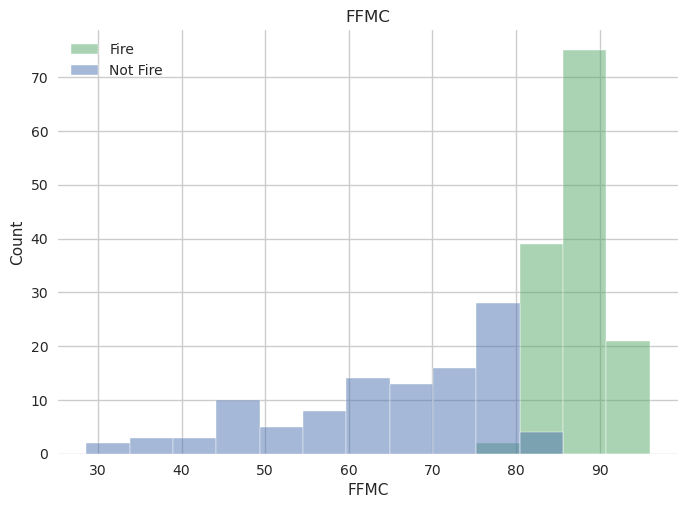

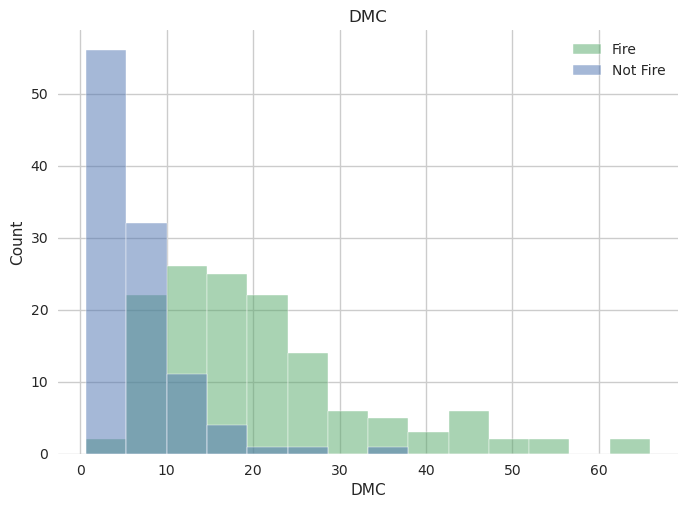

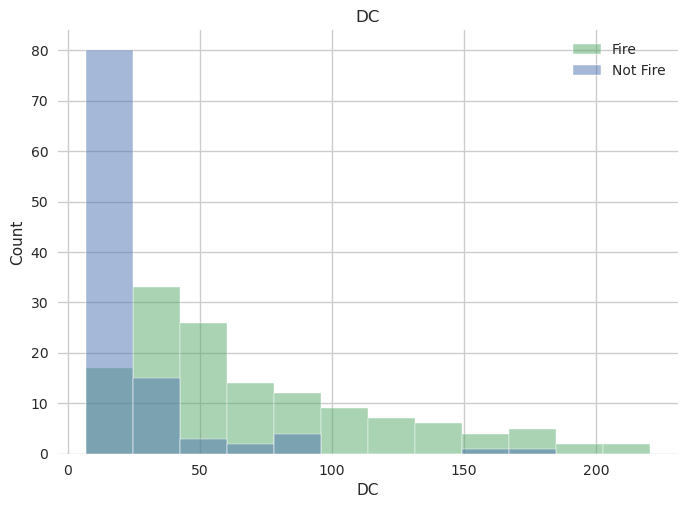

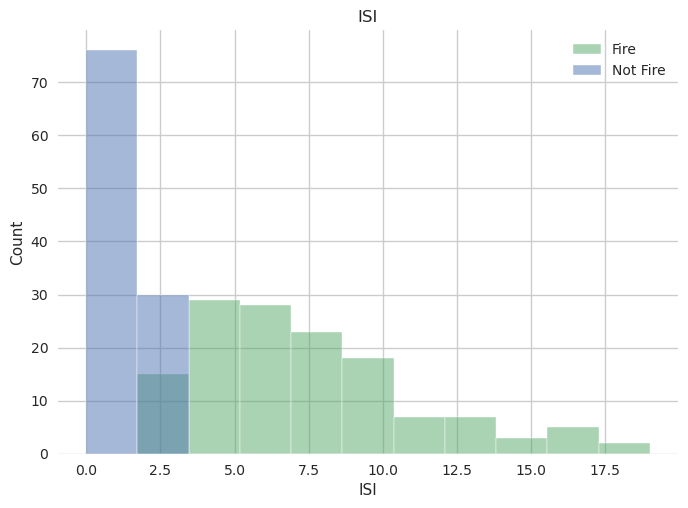

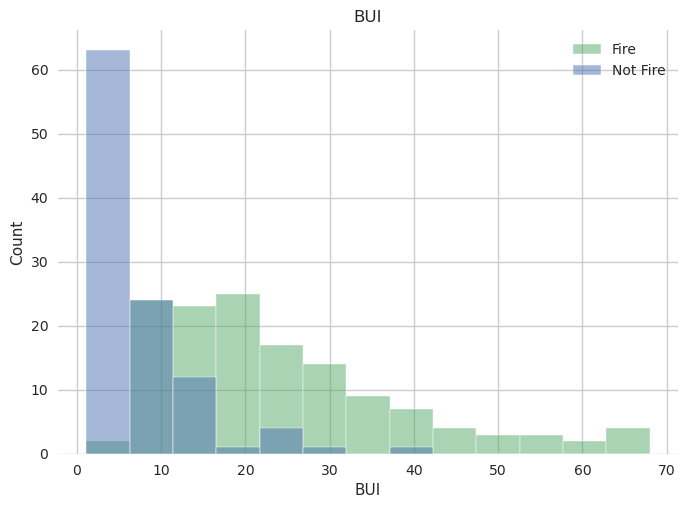

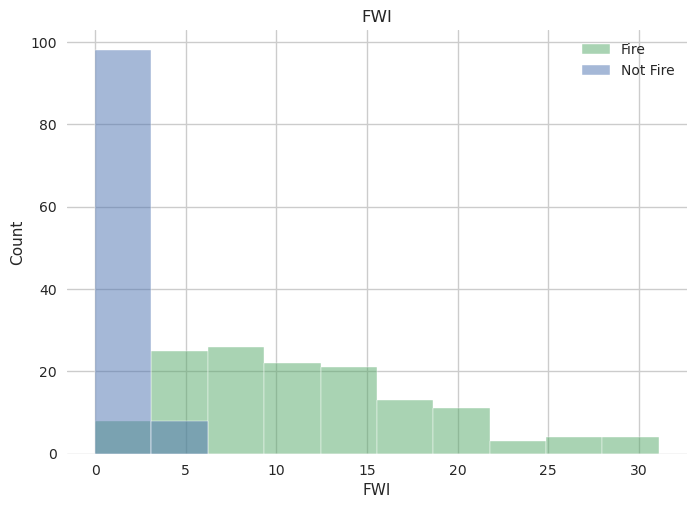

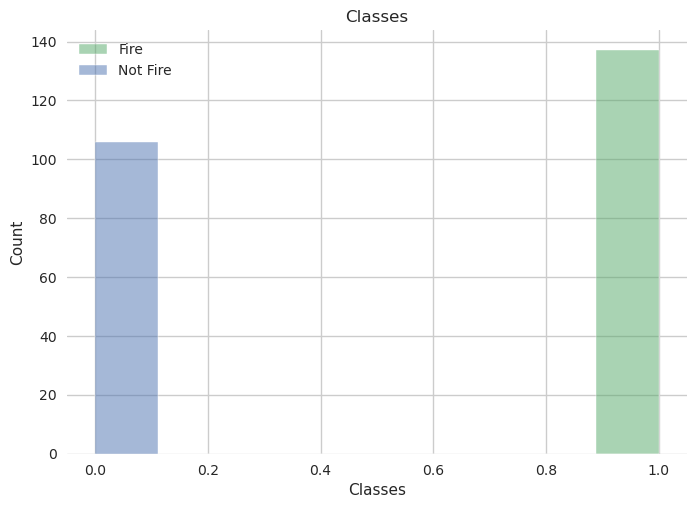

In [145]:
dftemp =  df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

# REPORT

# Weather System Report

Temperature Highest Fire counts happened between 30-37 degree Celsius

Rain Highest Fire counts happened when there was no rain to very less rain ie. 0.0 to 0.3.

Wind Speed highest Fire count happened when the wind speed were between 13 to 19 Km/hr.

Relative Humidity highest fire count happened when the RH is between 50 to 80%.

# FWI System Components Report

FWI (Canadian Forest Fire Weather Index)

Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 92.5, here above 75 has higher chance of Forest fires.

Duff Moisture Code (DMC) index which ranges between 1.1 to 65.9, here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has very high evidence of Forest fires in past.

Drought Code (DC) index which ranges between 7 to 220.4, here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

Initial Spread Index (ISI) index which ranges between 0 to 18, here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

Buildup Index (BUI) index which ranges between 1.1 to 68, here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

Fire Weather Index (FWI) Index which ranges between 1 to 31.1, here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.



